# EDA on Taxi Data of New York

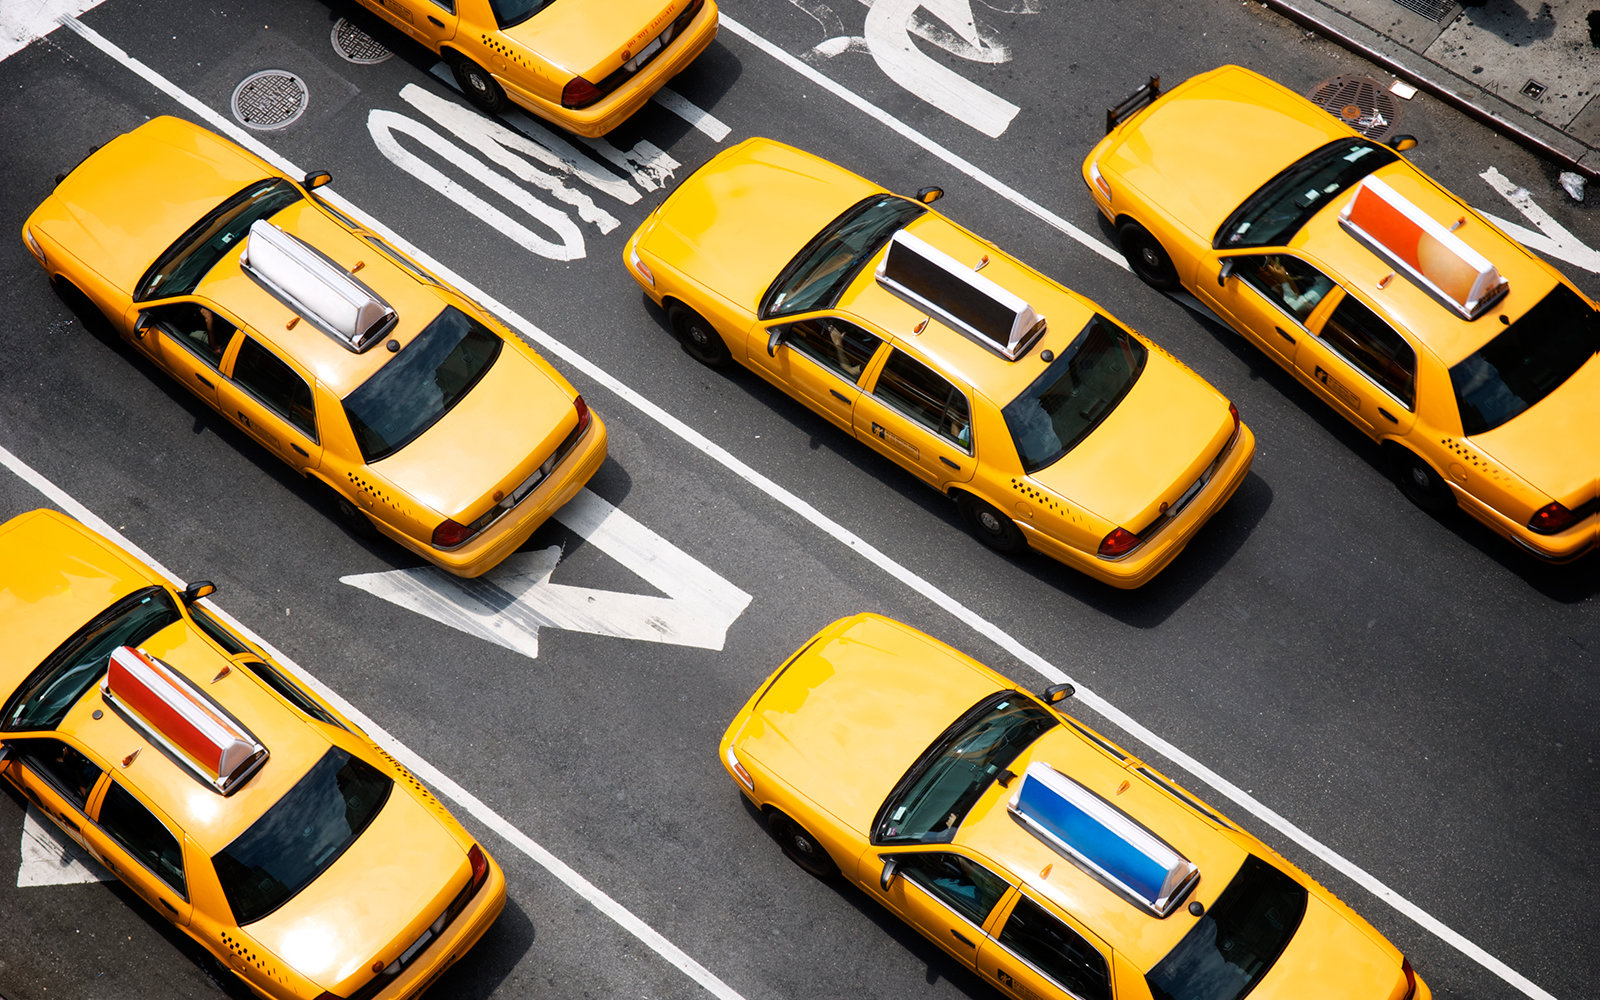

In [2]:
from IPython.display import Image
Image(filename='taxi-1110.jpg')


In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt


connection = pymysql.connect(host='localhost',
                             user='root',
                             password='hari123',
                             db='projectdb',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    
    
    with connection.cursor() as cursor:
        sql = "SELECT * FROM newyork_taxi_data"
        cursor.execute(sql)
        all_data = cursor.fetchall() 
        
        
finally:
    connection.close()
    

df_all_data = pd.DataFrame(all_data)


Text(0.5,1,'No of people in Cab rides.')

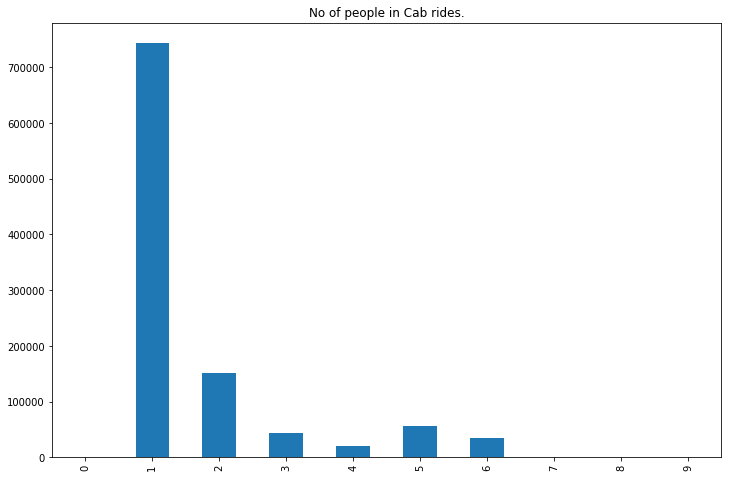

In [3]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='hari123',
                             db='projectdb',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    
    with connection.cursor() as cursor:
        sql = "SELECT count(passenger_count) as count, passenger_count as number FROM newyork_taxi_data group by passenger_count"
        cursor.execute(sql)
        passenger_count = cursor.fetchall() 
        
        
finally:
    connection.close()
    

passenger_count = pd.DataFrame(passenger_count)
plt.figure(figsize=(12,8))
passenger_count['count'].plot(kind = "bar")
plt.title("No of people in Cab rides.")



In [4]:
# Convert the date to a pandas datetime format
df_all_data['pickup_datetime'] = pd.to_datetime(df_all_data['pickup_datetime'])
df_all_data['dropoff_datetime'] = pd.to_datetime(df_all_data['dropoff_datetime'])

# Pull out the month, day of week and hour of day and make a new feature for each
df_all_data['month'] = df_all_data['pickup_datetime'].dt.month
df_all_data['dow'] = df_all_data['pickup_datetime'].dt.dayofweek
df_all_data['hour'] = df_all_data['pickup_datetime'].dt.hour

# Count number of pickups made per month, day of week and hour of day
month_usage = pd.value_counts(df_all_data['month']).sort_index()
dow_usage = pd.value_counts(df_all_data['dow']).sort_index()
hour_usage = pd.value_counts(df_all_data['hour']).sort_index()



There were a total of 1048575 Taxi pickups made


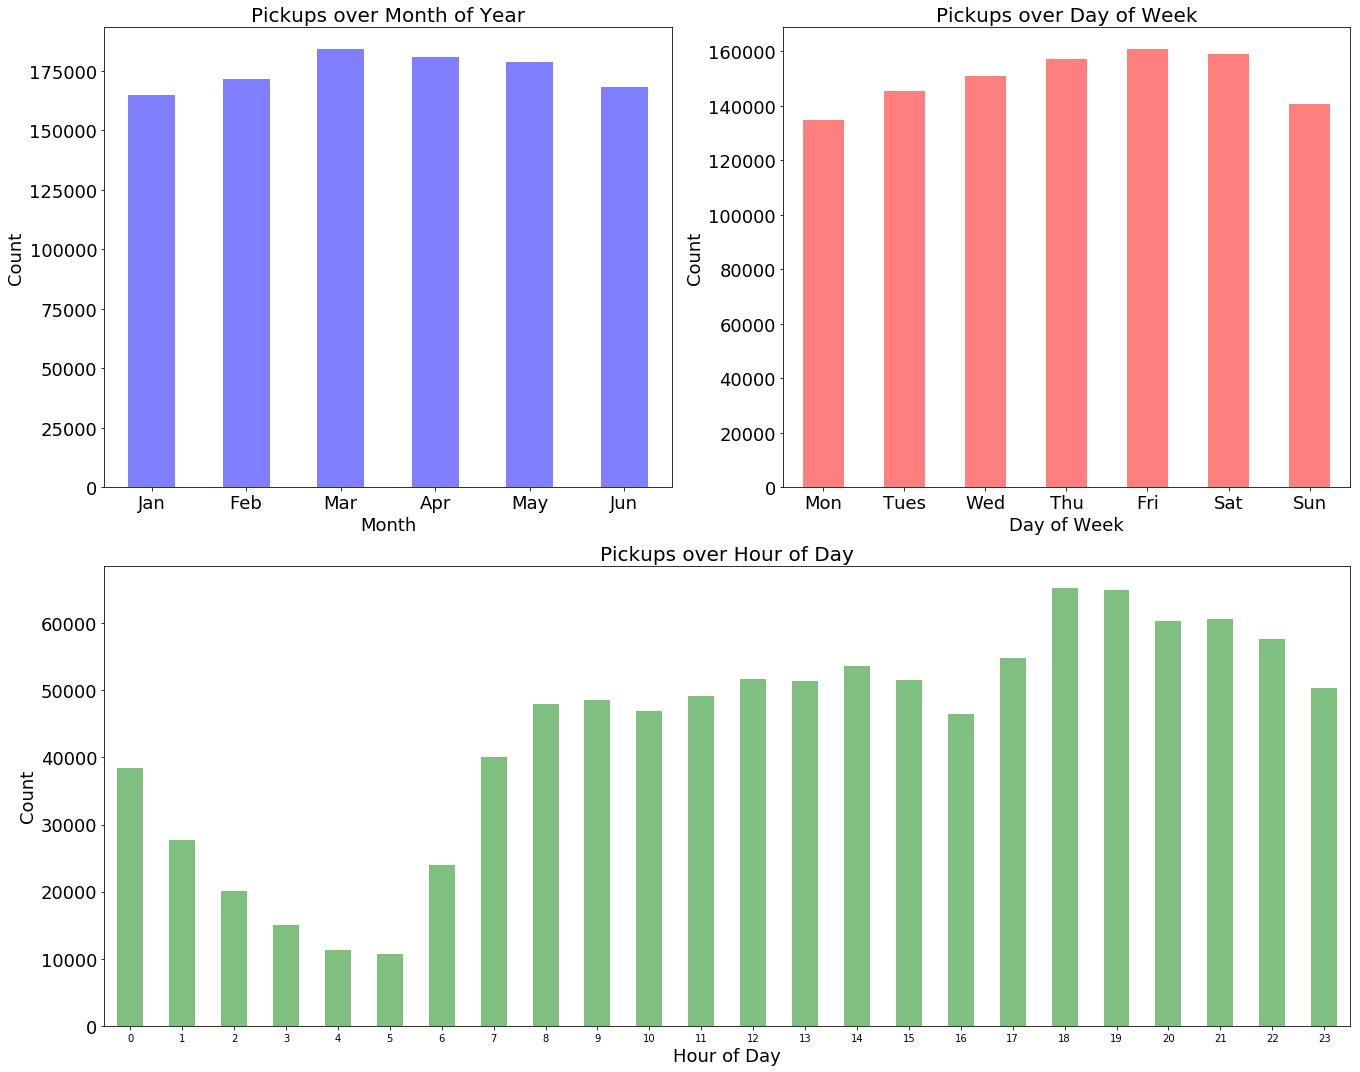

In [5]:
x_tick_labels_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
x_tick_labels_day = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# define subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(19, 15))

figure = plt.subplot(2, 2, 1)
month_usage.plot.bar(alpha = 0.5, color = 'b')
plt.title('Pickups over Month of Year', fontsize = 20)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(month_usage.index - 1, x_tick_labels_month, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 2, 2)
dow_usage.plot.bar(alpha = 0.5, color = 'r')
plt.title('Pickups over Day of Week', fontsize = 20)
plt.xlabel('Day of Week', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(dow_usage.index, x_tick_labels_day, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 1, 2)
hour_usage.plot.bar(alpha = 0.5, color = 'g')
plt.title('Pickups over Hour of Day', fontsize = 20)
plt.xlabel('Hour of Day', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

fig.tight_layout()
print ("There were a total of %d Taxi pickups made" % (len(df_all_data)))

Text(0,0.5,'Time in Seconds')

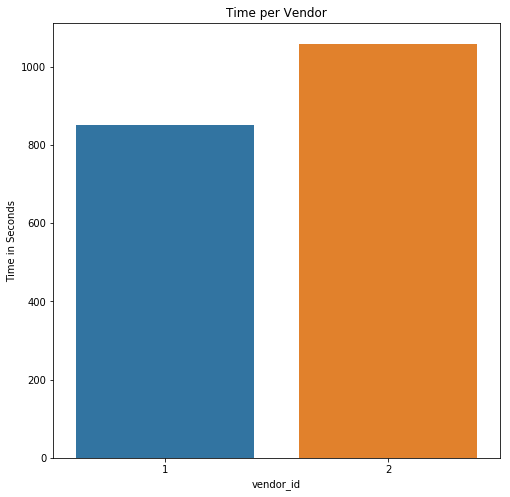

In [6]:
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt


connection = pymysql.connect(host='localhost',
                             user='root',
                             password='hari123',
                             db='projectdb',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    
    
    with connection.cursor() as cursor:
        sql = "SELECT vendor_id,AVG(trip_duration) as Mean FROM newyork_taxi_data group by vendor_id"
        cursor.execute(sql)
        avg_trip_duration = cursor.fetchall() 
        
        
finally:
    connection.close()
    
df_avg_trip_duration = pd.DataFrame(avg_trip_duration)


plot_vendor = df_avg_trip_duration
plt.subplots(1,1,figsize=(8,8))
sns.barplot(df_avg_trip_duration.vendor_id,df_avg_trip_duration.Mean)
plt.title('Time per Vendor')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')


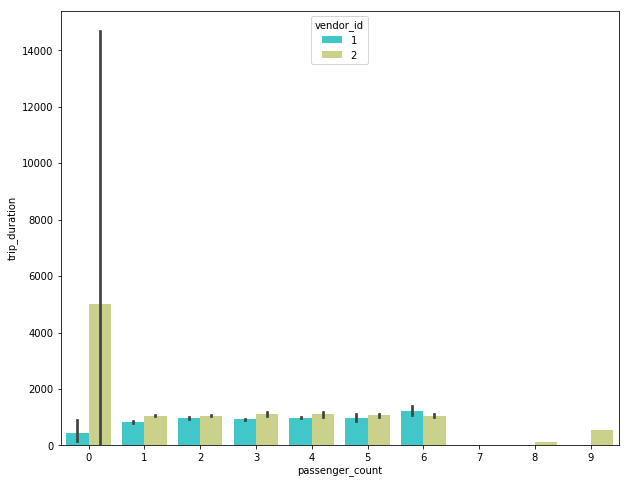

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x='passenger_count', y='trip_duration',hue='vendor_id', data=df_all_data,palette='rainbow')


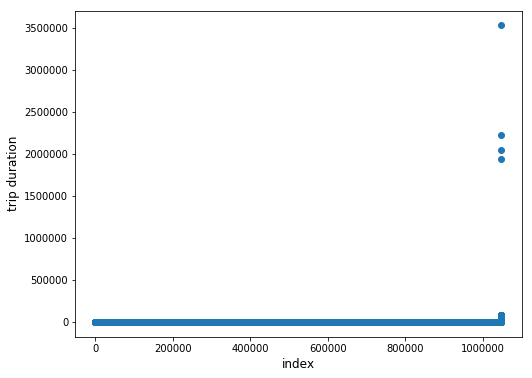

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_all_data.shape[0]), np.sort(df_all_data.trip_duration.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip duration', fontsize=12)
plt.show()

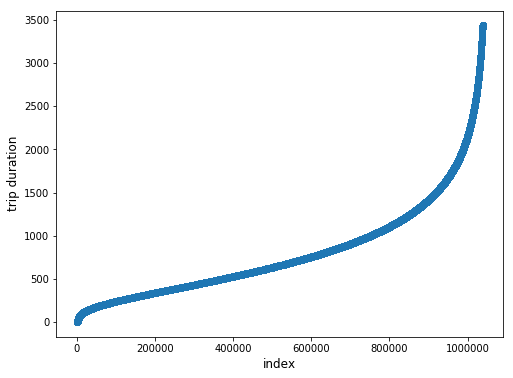

In [9]:
# in train dataset some trip duration are very high (I consider them outliers and remove them before replotting it)
q = df_all_data.trip_duration.quantile(0.99)
df_all_data = df_all_data[df_all_data.trip_duration < q]
plt.figure(figsize=(8,6))
plt.scatter(range(df_all_data.shape[0]), np.sort(df_all_data.trip_duration.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip duration', fontsize=12)
plt.show()

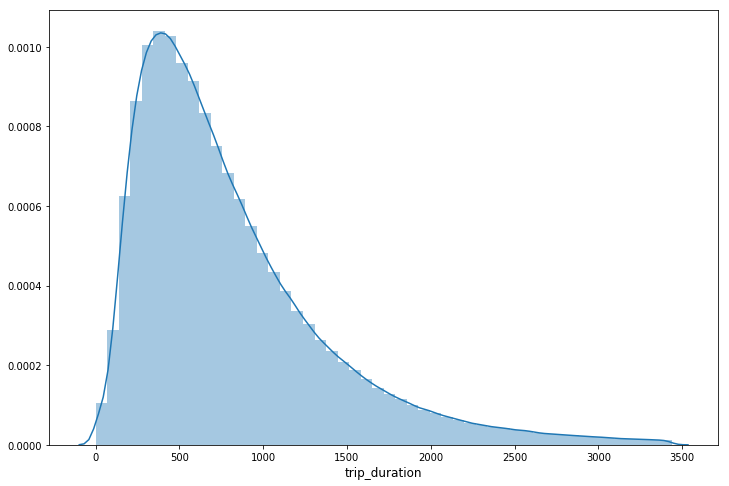

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df_all_data.trip_duration.values, bins=50, kde=True)
plt.xlabel('trip_duration', fontsize=12)
plt.show()

### Inference: The data is not normally distributed. Hence taking a median where ever we are using "trip duration" is more appropriate

C:\Users\harik\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


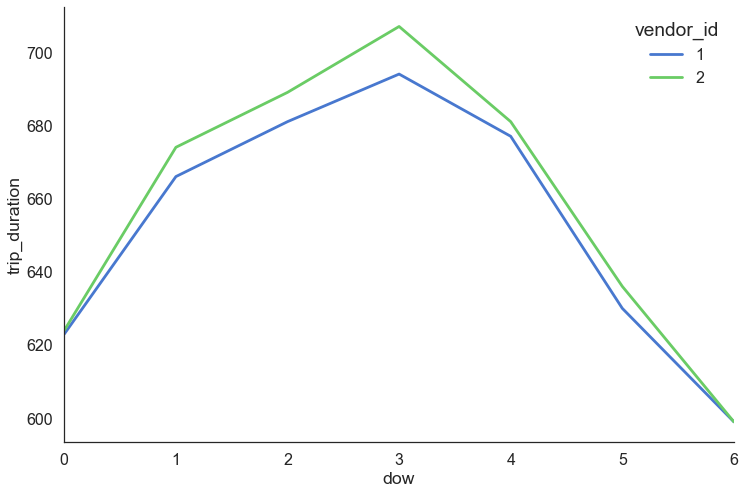

In [11]:
summary_wdays_avg_duration = pd.DataFrame(df_all_data.groupby(['vendor_id','dow'])['trip_duration'].median())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1
plt.figure(figsize=(12,8))
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="dow", unit = "unit", condition="vendor_id", value="trip_duration")
sns.despine(bottom = False)


C:\Users\harik\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


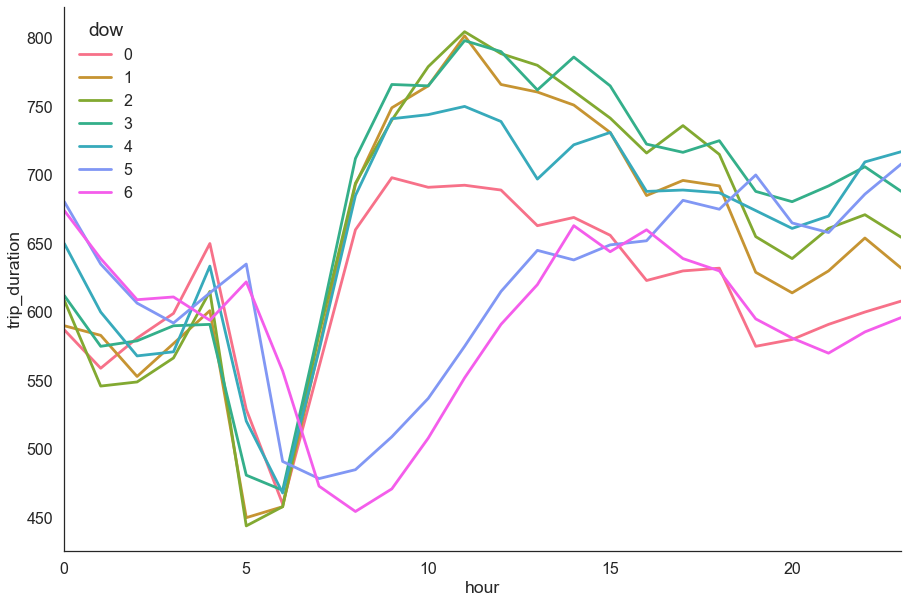

In [12]:

summary_hour_duration = pd.DataFrame(df_all_data.groupby(['dow','hour'])['trip_duration'].median())
summary_hour_duration.reset_index(inplace = True)
summary_hour_duration['unit']=1
plt.figure(figsize=(15,10))
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_hour_duration, time="hour", unit = "unit", condition="dow", value="trip_duration")
sns.despine(bottom = False)


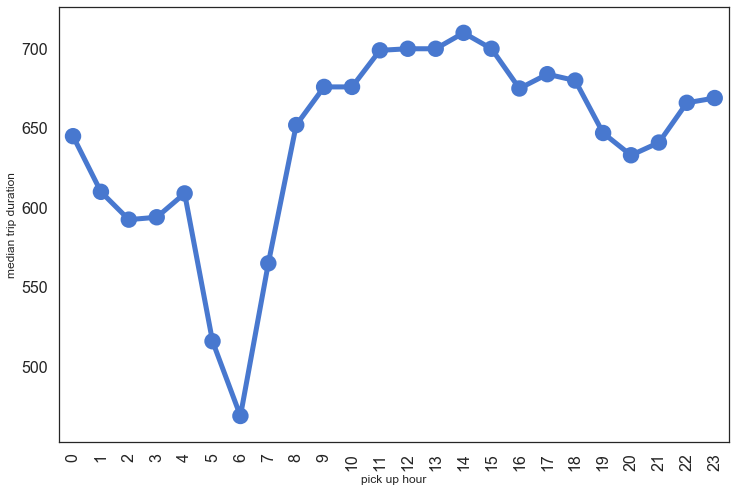

In [18]:
grouped_df = df_all_data.groupby('hour')['trip_duration'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.hour.values, grouped_df.trip_duration.values, alpha=0.8)
plt.ylabel('median trip duration', fontsize=12)
plt.xlabel('pick up hour', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

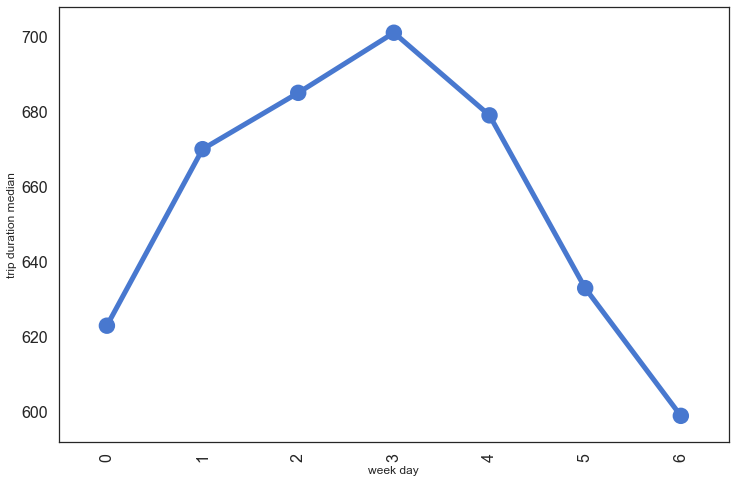

In [19]:
# Group by day
grouped_df = df_all_data.groupby('dow')['trip_duration'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.dow.values, grouped_df.trip_duration.values, alpha=0.8)
plt.ylabel('trip duration median', fontsize=12)
plt.xlabel('week day', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [5]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='hari123',
                             db='projectdb',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
                
    with connection.cursor() as cursor:
        sql = "SELECT pickup_longitude,dropoff_longitude,pickup_latitude,dropoff_latitude FROM newyork_taxi_data where pickup_longitude<'-73.77' and pickup_longitude>'-74.03' and dropoff_longitude<'-73.77' and dropoff_longitude>'-74.03' and pickup_latitude<'40.85' and pickup_latitude>'40.63' and dropoff_latitude>'40.63' and dropoff_latitude<'40.85'"
        cursor.execute(sql)
        limit_pickup_dropoff = cursor.fetchall()
        
        
finally:
    connection.close()
    
df_limit_pickup_dropoff=pd.DataFrame(limit_pickup_dropoff)


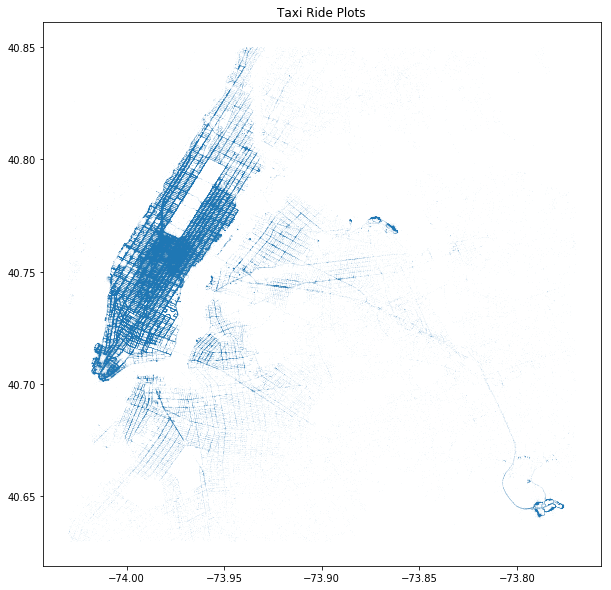

In [6]:

longitude = list(df_limit_pickup_dropoff.pickup_longitude) + list(df_limit_pickup_dropoff.dropoff_longitude)
latitude = list(df_limit_pickup_dropoff.pickup_latitude) + list(df_limit_pickup_dropoff.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.title('Taxi Ride Plots')
plt.show()


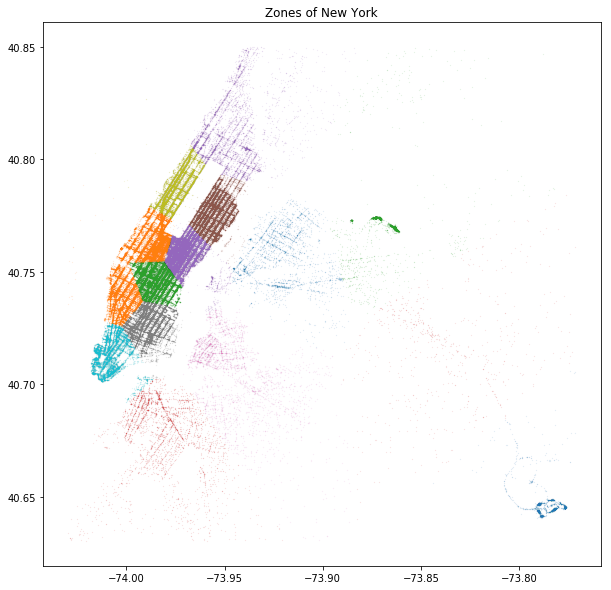

In [7]:

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

df_location = pd.DataFrame()
df_location['longitude'] = longitude
df_location['latitude'] = latitude

kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(df_location)
df_location['label'] = kmeans.labels_

df_location = df_location.sample(200000)
plt.figure(figsize = (10,10))
for label in df_location.label.unique():
    plt.plot(df_location.longitude[df_location.label == label],df_location.latitude[df_location.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Zones of New York')
plt.show()


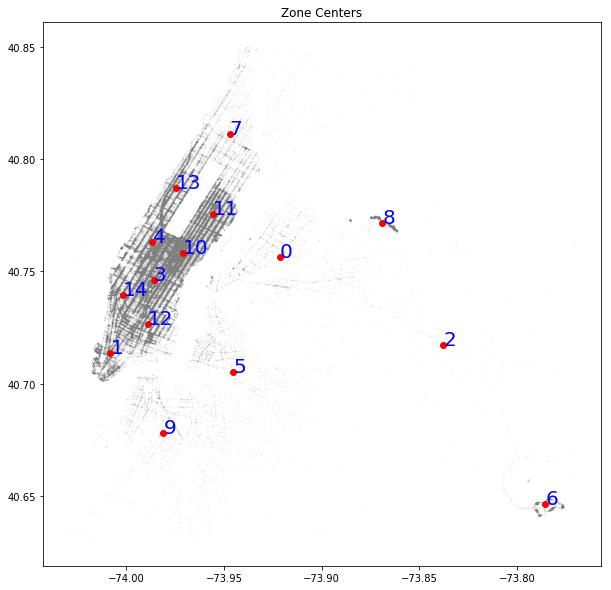

In [7]:
fig,ax = plt.subplots(figsize = (10,10))
for label in df_location.label.unique():
    ax.plot(df_location.longitude[df_location.label == label],df_location.latitude[df_location.label == label],'.', alpha = 0.4, markersize = 0.1, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Zone Centers')
plt.show()